In [1]:
import pandas as pd
import numpy as np
import xlrd
from matplotlib import pyplot as plt
import seaborn as sns


###说明###
# 
# 通过pd.set_option?可以查看这个方法怎么用，后续的所有操作方法一样不再赘述
# 使用原则是需要用的数据整理出来后，进行处理操作时建议用新变量进行copy然后处理，防止数据混杂，也方便不同场景进行导出
#
#########

# 基础配置（一般不需要动）
pd.set_option('display.max_rows',None) # 让pandas展示全部数据（没这个配置会显示省略号）
pd.set_option('display.max_column',None) # 让pandas展示全部数据（没这个配置会显示省略号）
pd.set_option('display.max_colwidth',500) # 让特别长的字段内容全部展示（没这个配置会显示省略号）
pd.set_option('display.width',200) # 让展示时不换行
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
file_path = 'deep_research.xlsx' # 最好是绝对路径
save_file_path = 'tmp.xlsx'

# 千分位格式化函数
def to_thousands_display(x):
    if x != 'NaN':
        return format(x,',')
    
# 需要使用的数据字段（可能需要每次定制）
sample_list=['ID', '下单日期', '丘比特订单号', '代理公司名称', '广告主公司名称','品牌名称', 
        '所属行业', '执行开始日期', '执行结束日期', '合同状态', '归属季度', '执行金额',
        'PC端金额', '移动端金额', 'TV端金额', '多屏金额', '广告主(调整后)', '代理商分类',
        '所属行业(调整后)', 'Year', '1月(调整前)', '2月', '3月', '4月(调整前)', 
        '5月', '6月', '7月(调整前)', '8月', '9月', '10月(调整前)', 
        '11月', '12月', 'Var.', '1月', '4月', '7月', '10月']

In [2]:
# 获取Sheet页
xlrd_object = xlrd.open_workbook(file_path) # 用xlrd读取excel
sheets_name = sheets = xlrd_object.sheet_names() # 获取所有sheet页名字

In [2]:
# 正式开始pandas对数据进行操作
# 初始化（需要指定读取哪个sheet）
iqiyi_data_syht = pd.read_excel(file_path,sheet_name='2014-2018年商业合同（按执行金额）') # DataFrame读取excel
iqiyi_data_syht.info() # 查看表的基础信息，包含数据条数，数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43109 entries, 0 to 43108
Data columns (total 49 columns):
ID           0 non-null float64
提审区域         9716 non-null object
下单日期         43109 non-null datetime64[ns]
丘比特订单号       9657 non-null object
合同类型         42731 non-null object
合同编号         42069 non-null object
代理公司名称       43109 non-null object
广告主公司名称      43109 non-null object
品牌名称         43109 non-null object
所属行业         43109 non-null object
渠道销售         43109 non-null object
直客销售         43109 non-null object
TV销售         9714 non-null object
投放收入         9716 non-null object
其他收入         9716 non-null object
合同金额         43109 non-null object
执行开始日期       43109 non-null object
执行结束日期       43109 non-null object
合同状态         43109 non-null object
预计回款日期       41522 non-null object
多账期备注        9715 non-null object
归属季度         43109 non-null object
执行金额         43109 non-null float64
PC端金额        9714 non-null float64
移动端金额        9713 non-null float64
TV端金额        971

In [5]:
# 将需要的数据范围传给iqiyi_data_syht_tzh
iqiyi_data_syht.shape # (43109, 49)43109条数据，一共49列
iqiyi_data_syht.head() # 展示数据。默认显示前10条，如果需要指定显示的条数据可以类似iqiyi_data_syht.head(10)
iqiyi_data_syht_tzh=iqiyi_data_syht[(iqiyi_data_syht['归属季度']>='2016Q1')
                                    &(iqiyi_data_syht['归属季度']<='2018Q1')]# 数据筛选

In [ ]:
# 操作数据透视表（只将需要用的生成数据透视表）
pivot_data=pd.DataFrame() # 生成数据透视表对象
pivot_data['归属季度']=iqiyi_data_syht_tzh['归属季度'] # 取归属季度数据
pivot_data['所属行业(调整后)']=iqiyi_data_syht_tzh['所属行业(调整后)'] # 取所属行业（调整后）数据
pivot_data['执行金额']=iqiyi_data_syht_tzh['执行金额'] # 取执行金额数据
pivot_table_object = pd.pivot_table(pivot_data,columns=['归属季度'],
                                    values=['执行金额'],index=['所属行业(调整后)']) # 生成透视表，columns为行，values为值，index为列。values级别最高，所以对数据透视表再处理时需要执行下面语句
last_data=pivot_table_object['执行金额'] # 最终需要处理的数据行为归属季度，列为所属行业（调整后）
last_data.sort_values('2018Q1') # 用2018Q1这列进行排序，可以指定顺序还是逆序，具体方法需要自己查
# 可以对数据直接做千分位处理，但此操作可能会直接篡改数据类型，故建议用新的DataFrame对象进行处理，如下
last_data_branch_1 = last_data.copy() #复制
last_data_branch_1.applymap(to_thousands_display).sort_values('2018Q1')#对新的对象做处理

In [ ]:
last_data.to_excel(save_file_path) # 存文件

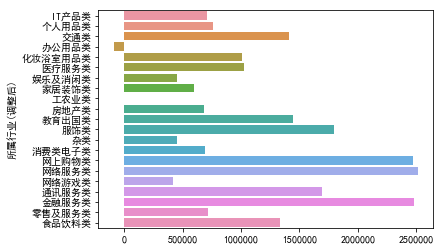

In [12]:
sns.barplot(x=last_data['2018Q1'].values,y=last_data.index) # 根据数据透视表画条形图,last_data中2018Q1列的值为x，整个表的行名为y

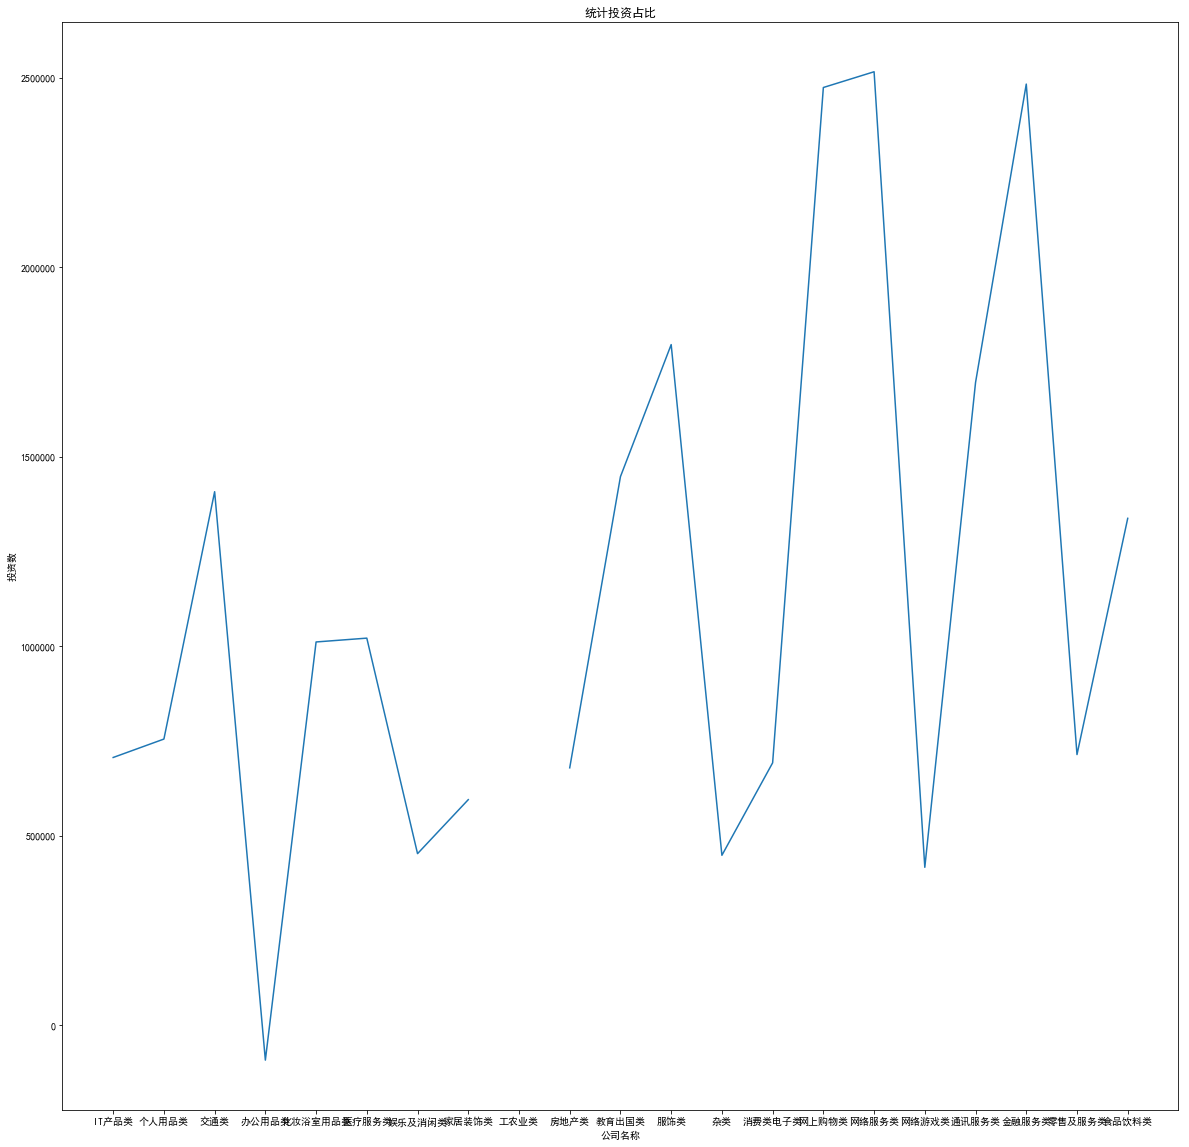

In [14]:
# 画折现图
plt.figure(figsize = (20,20))# 指定图的大小
plt.plot(last_data.index,last_data['2018Q1'].values) #需要画的图的数据配置
plt.xlabel('公司名称') #x标签名
plt.xticks(rotation=90) #x标签90度旋转，防止过长重叠
plt.ylabel('投资数') #y标签名
plt.title('统计投资占比') #题目
plt.show() #展示图表

In [3]:
# 需要处理的数据单独储存在sample的方法
sample = pd.DataFrame()
for i in sample_list:
    sample[i]=iqiyi_data_syht[i]
sample.to_excel(save_file_path)

In [ ]:
# 查看每列有多少空数据
iqiyi_data_syht.isnull().sum()
# 填充空值
iqiyi_data_syht.fillna(x)

In [ ]:
# 对describe结果做友好展示
htxx_zzsfp_xxfp_data.describe()
htxx_zzsfp_xxfp_data.describe().info()
htxx_zzsfp_xxfp_data.describe().applymap(to_thousands_display)
htxx_zzsfp_xxfp_data.corr() # 查看相关性

In [4]:
data = pd.read_excel('exercise.xlsx')

In [5]:
data.head()

,年龄,数值,行业
0,90,10,1
1,80,12,1
2,70,15,1
3,90,20,2
4,80,22,2


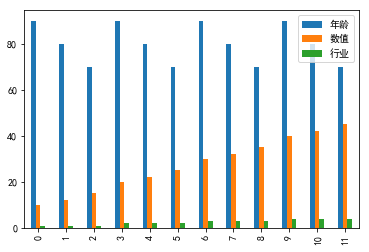

In [8]:
data.plot(kind='bar')

In [ ]:
# 写入多个Sheet
writer = pd.ExcelWriter('write.xlsx')
data_1 = pd.DataFrame()
data_1['测试1']=[1,2,3]
data_1.to_excel(writer,sheet_name='Sheet1')
data_2 = pd.DataFrame()
data_2['测试2']=[4,5,6]
data_2.to_excel(writer,sheet_name='Sheet2')
writer.save()

In [ ]:
# 只取时间的年月日 
pd.to_datetime(file1_data['update_time（更新时间）']).dt.floor('d')

#去重、分组、计数、取数
file1_data.drop_duplicates('vin（车辆VIN码）').groupby('update_time（更新时间）').count()['user_name（用户名）']